# Skin Cancer Classification for Detecting Melanoma

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "https://github.com/soheillll/Skin-cancer-recoginition",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

In [0]:
# Importing the libraries
import numpy as np
import pandas as pd
import os
from sklearn.datasets import load_files
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'qrpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))
  
except KeyError:
  print('TPU not found')

TPU not found


In [0]:
#load from gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls ./gdrive/"My Drive"/*.zip

'./gdrive/My Drive/997_52_SavedT.zip'  './gdrive/My Drive/Harvard.zip'
'./gdrive/My Drive/d01.zip'	       './gdrive/My Drive/ISIC-images.zip'
'./gdrive/My Drive/d02.zip'	       './gdrive/My Drive/Mednode_dataset.zip'
'./gdrive/My Drive/d03.zip'	       './gdrive/My Drive/SavedT.zip'
'./gdrive/My Drive/d04.zip'	       './gdrive/My Drive/Xception.zip'
'./gdrive/My Drive/d05.zip'


In [0]:
!unzip ./gdrive/"My Drive"/d02.zip

Archive:  ./gdrive/My Drive/d02.zip
   creating: d02/
   creating: d02/benign/
  inflating: d02/benign/ISIC_0010512.jpg  
  inflating: d02/benign/ISIC_0010889.jpg  
 extracting: d02/benign/ISIC_0024312.jpg  
  inflating: d02/benign/ISIC_0024324.jpg  
  inflating: d02/benign/ISIC_0024329.jpg  
 extracting: d02/benign/ISIC_0024336.jpg  
  inflating: d02/benign/ISIC_0024337.jpg  
  inflating: d02/benign/ISIC_0024338.jpg  
 extracting: d02/benign/ISIC_0024358.jpg  
  inflating: d02/benign/ISIC_0024371.jpg  
 extracting: d02/benign/ISIC_0024372.jpg  
 extracting: d02/benign/ISIC_0024381.jpg  
  inflating: d02/benign/ISIC_0024382.jpg  
 extracting: d02/benign/ISIC_0024383.jpg  
  inflating: d02/benign/ISIC_0024408.jpg  
  inflating: d02/benign/ISIC_0024409.jpg  
 extracting: d02/benign/ISIC_0024412.jpg  
  inflating: d02/benign/ISIC_0024418.jpg  
 extracting: d02/benign/ISIC_0024420.jpg  
  inflating: d02/benign/ISIC_0024422.jpg  
 extracting: d02/benign/ISIC_0024426.jpg  
  inflating: d02/b

In [0]:
!unzip ./gdrive/"My Drive"/Mednode_dataset.zip

Archive:  ./gdrive/My Drive/Mednode_dataset.zip
   creating: Mednode dataset/
   creating: Mednode dataset/benign/
  inflating: Mednode dataset/benign/132357.jpg  
  inflating: Mednode dataset/benign/151560-h.jpg  
  inflating: Mednode dataset/benign/156136.jpg  
  inflating: Mednode dataset/benign/159033.jpg  
  inflating: Mednode dataset/benign/162029.jpg  
  inflating: Mednode dataset/benign/163067.jpg  
  inflating: Mednode dataset/benign/165021.jpg  
  inflating: Mednode dataset/benign/1697738.jpg  
  inflating: Mednode dataset/benign/170216.jpg  
  inflating: Mednode dataset/benign/174267.jpg  
  inflating: Mednode dataset/benign/19085.jpg  
  inflating: Mednode dataset/benign/194942.jpg  
  inflating: Mednode dataset/benign/194946.jpg  
  inflating: Mednode dataset/benign/202700-h.jpg  
  inflating: Mednode dataset/benign/2055339.jpg  
  inflating: Mednode dataset/benign/2084031.jpg  
  inflating: Mednode dataset/benign/2085285.jpg  
  inflating: Mednode dataset/benign/2085287.j

In [0]:
!unzip ./gdrive/"My Drive"/SavedT.zip

Archive:  ./gdrive/My Drive/SavedT.zip
  inflating: Saved models/weights.best.inception.hdf5  
  inflating: Saved models/weights.best.mobilenet.hdf5  
  inflating: Saved models/weights.best.xception.hdf5  


## 1. Preprocessing

### 1.1. Data preprocessing

In [0]:
!ls -a ./"d02"

.  ..  benign  melanoma


In [0]:
# Load text files with categories as subfolder names.
#path = "./Dataset/Image dataset/"
#data = load_files(path)
path = "./d02/"
data = load_files(path)

In [0]:
print("Filename: \n", data['filenames'][:5])
print("Targets: \n", data['target'][:5])

Filename: 
 ['./d02/benign/ISIC_0024420.jpg' './d02/melanoma/ISIC_0032400.jpg'
 './d02/melanoma/ISIC_0031709.jpg' './d02/benign/ISIC_0024923.jpg'
 './d02/melanoma/ISIC_0032441.jpg']
Targets: 
 [0 1 1 0 1]


In [0]:
# Getting the labels
target = np_utils.to_categorical(np.array(data['target']), 2)
target

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [0]:
len(data['filenames']) * 0.95

190.0

In [0]:
# Splitting the data into the training and validation set
#train_files, train_targets = data['filenames'][:30229], target[:30229]
#valid_files, valid_targets = data['filenames'][30229:], target[30229:]

train_files, train_targets = data['filenames'][:190], target[:190]
valid_files, valid_targets = data['filenames'][190:], target[190:]


In [0]:
#release mem 
import gc
del data
gc.collect()

0

### 1.2. Image preprocessing

In [0]:
# Importing the libraries
import keras
from keras.preprocessing import image                  
from tqdm import tqdm
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

In [0]:
def path_to_tensor(img_path):
    """
    Getting a tensor from a given path.
    """
    # Loading the image
    img = image.load_img(img_path, target_size=(512, 512))
    # Converting the image to numpy array
    x = image.img_to_array(img)   
    # convert 3D tensor to 4D tensor with shape (1, 512, 512, 3)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    """
    # Getting a list of tensors from a given path directory.
    """
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [0]:
# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255

100%|██████████| 10/10 [00:00<00:00, 78.96it/s]


In [0]:
!mkdir ./"Saved image tensors"

In [0]:
!mkdir ./"Saved models"

mkdir: cannot create directory ‘./Saved models’: File exists


In [0]:
!ls -la

total 36
drwxr-xr-x 1 root root 4096 Mar 31 05:06  .
drwxr-xr-x 1 root root 4096 Mar 31 05:02  ..
drwxr-xr-x 1 root root 4096 Mar 27 20:25  .config
drwxr-xr-x 4 root root 4096 Mar 31  2019  d02
drwx------ 3 root root 4096 Mar 31 05:05  gdrive
drwxr-xr-x 4 root root 4096 Mar 31  2019 'Mednode dataset'
drwxr-xr-x 1 root root 4096 Mar 27 20:26  sample_data
drwxr-xr-x 2 root root 4096 Mar 31 05:06 'Saved image tensors'
drwxr-xr-x 2 root root 4096 Mar 31 05:06 'Saved models'


In [0]:
# Saving the data
np.save("./Saved image tensors/augmented_training_tensors.npy", train_tensors)
np.save("./Saved image tensors/augmented_validation_tensors.npy", valid_tensors)

In [0]:
# Loading the data
train_tensors = np.load("./Saved image tensors/augmented_training_tensors.npy")
valid_tensors = np.load("./Saved image tensors/augmented_validation_tensors.npy")

## 2. Training the model

In [0]:
# Importing the keras libraries
import keras
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard

### 2.1. MobileNet architecture

In [0]:
def mobilenet_architecture():
    """
    Pre-build architecture of mobilenet for our dataset.
    """
    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    mobilenet_model = Model(base_model.input, output)
    
    # Getting the summary of architecture
    #mobilenet_model.summary()
    
    # Compiling the model
    mobilenet_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])

    return mobilenet_model

In [0]:
# Getting the mobilenet
mobilenet_model = mobilenet_architecture()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Loading the weights
mobilenet_model.load_weights("./Saved models/weights.best.mobilenet.hdf5")

In [0]:
checkpointer = ModelCheckpoint(filepath='Saved models/weights.best.mobilenet.hdf5', 
                               verbose=1, 
                               save_best_only=True)

mobilenet_model.fit(train_tensors, 
                    train_targets, 
                    batch_size = 8,
                    validation_data = (valid_tensors, valid_targets),
                    epochs = 5,
                    callbacks=[checkpointer], 
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 190 samples, validate on 10 samples
Epoch 1/5
190/190 [==============================] - 20s 107ms/step - loss: 0.6395 - acc: 0.6632 - val_loss: 0.5485 - val_acc: 0.8000

Epoch 00001: val_loss improved from inf to 0.54847, saving model to Saved models/weights.best.mobilenet.hdf5
Epoch 2/5
190/190 [==============================] - 11s 60ms/step - loss: 0.5948 - acc: 0.6895 - val_loss: 0.5379 - val_acc: 0.8000

Epoch 00002: val_loss improved from 0.54847 to 0.53790, saving model to Saved models/weights.best.mobilenet.hdf5
Epoch 3/5
190/190 [==============================] - 11s 59ms/step - loss: 0.6202 - acc: 0.6947 - val_loss: 0.8001 - val_acc: 0.4000

Epoch 00003: val_loss did not improve from 0.53790
Epoch 4/5
190/190 [==============================] - 11s 60ms/step - loss: 0.6127 - acc: 0.6842 - val_loss: 1.8974 - val_acc: 0.4000

Epoch 00004: val_loss did not improve from 0.53790
Epoch 5/5
190/190 [===========================

In [0]:
!zip SavedT.zip ./"Saved models"/* 

  adding: Saved models/weights.best.inception.hdf5 (deflated 8%)
  adding: Saved models/weights.best.mobilenet.hdf5 (deflated 8%)
  adding: Saved models/weights.best.xception.hdf5 (deflated 7%)
  adding: Saved image tensors/augmented_training_tensors.npy (deflated 79%)
  adding: Saved image tensors/augmented_validation_tensors.npy (deflated 81%)


In [0]:
!ls -la

total 623284
drwxr-xr-x 1 root root      4096 Mar 31 05:09  .
drwxr-xr-x 1 root root      4096 Mar 31 05:02  ..
drwxr-xr-x 1 root root      4096 Mar 27 20:25  .config
drwxr-xr-x 4 root root      4096 Mar 31  2019  d02
drwx------ 3 root root      4096 Mar 31 05:05  gdrive
drwxr-xr-x 4 root root      4096 Mar 31  2019 'Mednode dataset'
drwxr-xr-x 1 root root      4096 Mar 27 20:26  sample_data
drwxr-xr-x 2 root root      4096 Mar 31 05:06 'Saved image tensors'
drwxr-xr-x 2 root root      4096 Mar 31 05:06 'Saved models'
-rw-r--r-- 1 root root 638200672 Mar 31 05:09  SavedT.zip


In [0]:
!cp ./SavedT.zip ./gdrive/"My Drive"/.

In [0]:
# Loading the weights
mobilenet_model.load_weights("./Saved models/weights.best.mobilenet.hdf5")

### 2.2. Inception architecture

In [0]:
def inception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model 
    from keras.applications.inception_v3 import InceptionV3

    # Pre-build model
    base_model = InceptionV3(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    inception_model = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    inception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return inception_model

In [0]:
# Getting the inception
inception_model = inception_architecture()

In [0]:
# Loading the weights
inception_model.load_weights("./Saved models/weights.best.inception.hdf5")

In [0]:
checkpointer = ModelCheckpoint(filepath='Saved models/weights.best.inception.hdf5', 
                               verbose=1, 
                               save_best_only=True)

inception_model.fit(train_tensors, 
                    train_targets, 
                    batch_size = 8,
                    validation_data = (valid_tensors, valid_targets),
                    epochs = 5,
                    callbacks=[checkpointer], 
                    verbose=1)

Train on 190 samples, validate on 10 samples
Epoch 1/5
190/190 [==============================] - 50s 264ms/step - loss: 1.1805 - acc: 0.5579 - val_loss: 8.3880 - val_acc: 0.4000

Epoch 00001: val_loss improved from inf to 8.38796, saving model to Saved models/weights.best.inception.hdf5
Epoch 2/5
190/190 [==============================] - 23s 120ms/step - loss: 0.7267 - acc: 0.6263 - val_loss: 6.4472 - val_acc: 0.6000

Epoch 00002: val_loss improved from 8.38796 to 6.44725, saving model to Saved models/weights.best.inception.hdf5
Epoch 3/5
190/190 [==============================] - 23s 120ms/step - loss: 0.7517 - acc: 0.6053 - val_loss: 6.4472 - val_acc: 0.6000

Epoch 00003: val_loss improved from 6.44725 to 6.44724, saving model to Saved models/weights.best.inception.hdf5
Epoch 4/5
190/190 [==============================] - 23s 120ms/step - loss: 0.7244 - acc: 0.5526 - val_loss: 3.3343 - val_acc: 0.8000

Epoch 00004: val_loss improved from 6.44724 to 3.33432, saving model to Saved mo

In [0]:
!rm SavedT.zip

In [0]:
!zip SavedT.zip ./"Saved models"/* 

  adding: Saved models/weights.best.inception.hdf5 (deflated 8%)
  adding: Saved models/weights.best.mobilenet.hdf5 (deflated 8%)
  adding: Saved models/weights.best.xception.hdf5 (deflated 7%)


In [0]:
!cp ./SavedT.zip ./gdrive/"My Drive"/.

In [0]:
# Loading the weights
inception_model.load_weights("./Saved models/weights.best.inception.hdf5")

### 2.3. Xception architecture

In [0]:
def xception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model
    from keras.applications.xception import Xception

    # Pre-build model
    base_model = Xception(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    xception_model = Model(base_model.input, output)

    # Summary of the model
    #xception_model.summary()
    
    # Compiling the model
    xception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                           loss = 'categorical_crossentropy', 
                           metrics = ['accuracy'])

    return xception_model

In [0]:
# Getting the xception
xception_model = xception_architecture()

In [0]:
# Loading the weights
xception_model.load_weights("./Saved models/weights.best.xception.hdf5")

In [0]:
tensor_board = TensorBoard(log_dir='./logs', histogram_freq = 0, batch_size = 8)

checkpointer = ModelCheckpoint(filepath='Saved models/weights.best.xception.hdf5', 
                               verbose=1, 
                               save_best_only=True)

xception_model.fit(train_tensors, 
                   train_targets, 
                   batch_size = 8,
                   validation_data = (valid_tensors, valid_targets),
                   epochs = 2,
                   callbacks=[checkpointer, tensor_board], 
                   verbose=1)

Train on 190 samples, validate on 10 samples
Epoch 1/2
190/190 [==============================] - 56s 294ms/step - loss: 1.1354 - acc: 0.5632 - val_loss: 9.6709 - val_acc: 0.4000

Epoch 00001: val_loss improved from inf to 9.67086, saving model to Saved models/weights.best.xception.hdf5
Epoch 2/2
190/190 [==============================] - 44s 233ms/step - loss: 0.6743 - acc: 0.5789 - val_loss: 3.5573 - val_acc: 0.6000

Epoch 00002: val_loss improved from 9.67086 to 3.55729, saving model to Saved models/weights.best.xception.hdf5


In [0]:
!rm SavedT.zip

In [0]:
!zip SavedT.zip ./"Saved models"/* 

  adding: Saved models/weights.best.inception.hdf5 (deflated 8%)
  adding: Saved models/weights.best.mobilenet.hdf5 (deflated 8%)
  adding: Saved models/weights.best.xception.hdf5 (deflated 7%)


In [0]:
!cp ./SavedT.zip ./gdrive/"My Drive"/.

In [0]:
# Loading the weights
xception_model.load_weights("./Saved models/weights.best.xception.hdf5")

## 3. Prediction

In [0]:
model_architecture = mobilenet_architecture()
weight_path = "./Saved models/weights.best.mobilenet.hdf5"

In [0]:
def predict(img_path, 
            model_architecture = model_architecture, 
            path_model_weight = weight_path):
    # Getting the tensor of image
    image_to_predict = path_to_tensor(img_path).astype('float32')/255
    # Getting the model's architecture
    model = model_architecture
    # Loading the weights
    model.load_weights(path_model_weight)
    # Predicting
    pred = model.predict(image_to_predict)
    print("Prediction..." + " Melanoma : ", pred[0][1], " | Other : ", pred[0][0])
    if np.argmax(pred) == 1:
        return [1., 0.]
    elif np.argmax(pred) == 0:
        return [0., 1.]

In [0]:
!ls -la

total 497156
drwxr-xr-x 1 root root      4096 Mar 31 05:19  .
drwxr-xr-x 1 root root      4096 Mar 31 05:02  ..
drwxr-xr-x 1 root root      4096 Mar 27 20:25  .config
drwxr-xr-x 4 root root      4096 Mar 31 05:16  d02
drwx------ 3 root root      4096 Mar 31 05:05  gdrive
drwxr-xr-x 2 root root      4096 Mar 31 05:15  logs
drwxr-xr-x 4 root root      4096 Mar 31  2019 'Mednode dataset'
drwxr-xr-x 1 root root      4096 Mar 27 20:26  sample_data
drwxr-xr-x 2 root root      4096 Mar 31 05:06 'Saved image tensors'
drwxr-xr-x 2 root root      4096 Mar 31 05:06 'Saved models'
-rw-r--r-- 1 root root 509044551 Mar 31 05:19  SavedT.zip


In [0]:
#predict("./../Skin cancer/Dataset/melanoma/ISIC_001126890angle-flipped.jpg")
predict("./Mednode dataset/melanoma/189827.jpg")

Prediction... Melanoma :  0.87042373  | Other :  0.12957627


[1.0, 0.0]

In [0]:
!ls -la

total 497156
drwxr-xr-x 1 root root      4096 Mar 31 05:19  .
drwxr-xr-x 1 root root      4096 Mar 31 05:02  ..
drwxr-xr-x 1 root root      4096 Mar 27 20:25  .config
drwxr-xr-x 4 root root      4096 Mar 31 05:16  d02
drwx------ 3 root root      4096 Mar 31 05:05  gdrive
drwxr-xr-x 2 root root      4096 Mar 31 05:15  logs
drwxr-xr-x 4 root root      4096 Mar 31  2019 'Mednode dataset'
drwxr-xr-x 1 root root      4096 Mar 27 20:26  sample_data
drwxr-xr-x 2 root root      4096 Mar 31 05:06 'Saved image tensors'
drwxr-xr-x 2 root root      4096 Mar 31 05:06 'Saved models'
-rw-r--r-- 1 root root 509044551 Mar 31 05:19  SavedT.zip


In [0]:
# load evaluating data
path = "./Mednode dataset/"
data = load_files(path)

target = np_utils.to_categorical(np.array(data['target']), 2)

In [0]:
len(data['filenames']) * 0.95

190.0

In [0]:
train_files, train_targets = data['filenames'][:90], target[:90]
valid_files, valid_targets = data['filenames'][90:], target[90:]

## 4. Evaluating the model

In [0]:
# Importing the libraries
from sklearn.metrics import roc_curve, auc
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def compute_roc(y_true, y_score):
    """ 
    Computing the "Receiving Operating Characteristic curve" and area
    """
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_score) 
    auroc = auc(false_positive_rate, true_positive_rate) 
    return false_positive_rate, true_positive_rate, auroc

In [0]:
def plot_roc(y_true, y_score):
    """ 
    Ploting the Receiving Operating Characteristic curve
    """
    false_positive_rate, true_positive_rate, auroc = compute_roc(y_true, y_score)
    plt.figure(figsize=(10,6))
    plt.grid()
    plt.plot(false_positive_rate, 
             true_positive_rate, 
             color='darkorange',
             lw=2, 
             label='ROC curve (area = {:.2f})'.format(auroc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic example', fontsize=15)
    plt.legend(loc="lower right", fontsize=14)
    plt.show()

In [0]:
plt.style.available

['Solarize_Light2',
 'dark_background',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-dark',
 'seaborn',
 'grayscale',
 'seaborn-poster',
 'seaborn-notebook',
 'seaborn-deep',
 'seaborn-darkgrid',
 'classic',
 'seaborn-whitegrid',
 'seaborn-muted',
 'ggplot',
 'fast',
 'seaborn-dark-palette',
 'seaborn-talk',
 'seaborn-pastel',
 'bmh',
 'tableau-colorblind10',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-white',
 '_classic_test',
 'seaborn-colorblind']

In [0]:
plt.style.use("seaborn-white")

### 4.1. Evaluating MobileNet

In [0]:
# Compute test set predictions
NUMBER_TEST_SAMPLES = 100

y_true = valid_targets[:NUMBER_TEST_SAMPLES]
y_score = []
for index in range(NUMBER_TEST_SAMPLES): #compute one at a time due to memory constraints
    probs = predict(img_path = valid_files[index])
    print("Real values..." + "Melanoma : ", valid_targets[index][1], " | Other : ", valid_targets[index][0] )
    print("---------------------------------------------------------------------------")
    y_score.append(probs)
    
correct = np.array(y_true) == np.array(y_score)

Prediction... Melanoma :  0.77399904  | Other :  0.22600093
Real values...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.788924  | Other :  0.211076
Real values...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.9320426  | Other :  0.067957364
Real values...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.27982295  | Other :  0.72017705
Real values...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.88114595  | Other :  0.11885401
Real values...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.73912096  | Other :  0.26087904
Real values...Melanoma :  1.0  | O

In [0]:
print("Accuracy = %2.2f%%" % (np.mean(correct)*100))

Accuracy = 35.00%


In [0]:
# Re-ordering the actual y (for ROC)
y_true_2 = []
for i in range(len(y_true)):
    y_true_2.append(y_true[i][0])

In [0]:
# Re-ordering the predicte y (for ROC)
y_score_2 = []
for i in range(len(y_score)):
    y_score_2.append(y_score[i][0])

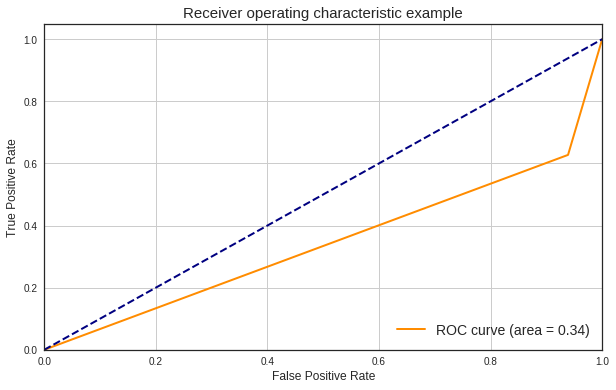

In [0]:
plot_roc(y_true_2, y_score_2)

In [0]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [0]:
TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE = positive_negative_measurement(y_true_2, y_score_2)
postives_negatives = [[TRUE_POSITIVE, FALSE_POSITIVE], 
                      [FALSE_NEGATIVE, TRUE_NEGATIVE]]

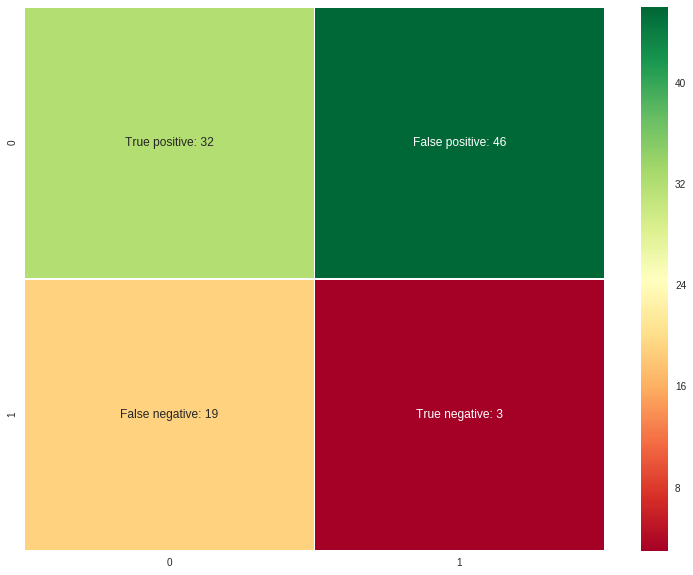

In [0]:
import seaborn as sns
sns.set()
labels =  np.array([['True positive: ' + str(TRUE_POSITIVE),
                     'False positive: ' + str(FALSE_POSITIVE)],
                    ['False negative: ' + str(FALSE_NEGATIVE),
                     'True negative: ' + str(TRUE_NEGATIVE)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives, annot = labels, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

In [0]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_NEGATIVE)
print("Sensitivity: ", sensitivity)

Sensitivity:  0.6274509803921569


In [0]:
# Specificity | selectivity | true negative rate (TNR)
print("TRUE_NEGATIVE::", TRUE_NEGATIVE)
print("FALSE_NEGATIVE::", FALSE_NEGATIVE)
print("TRUE_NEGATIVE + FALSE_NEGATIVE::" , (TRUE_NEGATIVE + FALSE_NEGATIVE))
specifity = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Specifity: ", specifity)

TRUE_NEGATIVE:: 3
FALSE_NEGATIVE:: 19
TRUE_NEGATIVE + FALSE_NEGATIVE:: 22
Specifity:  0.13636363636363635


In [0]:
# Precision | positive predictive value (PPV)
predcision = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_POSITIVE)
print("Precision: ", predcision)

Precision:  0.41025641025641024


In [0]:
# Negative predictive value (NPV)
npv = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Negative predictive value: ", npv)

Negative predictive value:  0.13636363636363635


In [0]:
# Accuracy 
accuracy = (TRUE_POSITIVE + TRUE_NEGATIVE) / (TRUE_POSITIVE + FALSE_POSITIVE + TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Accuracy: ", accuracy)

Accuracy:  0.35


### 4.2. Evaluating Inception

In [0]:
# Compute test set predictions
NUMBER_TEST_SAMPLES = 100

y_true = valid_targets[:NUMBER_TEST_SAMPLES]
y_score = []
for index in range(NUMBER_TEST_SAMPLES): #compute one at a time due to memory constraints
    probs = predict(img_path = valid_files[index])
    print("Real values {}...".format(index+1) + "Melanoma : ", valid_targets[index][1] , " | Other : ", valid_targets[index][0])
    print("---------------------------------------------------------------------------")
    y_score.append(probs)
    
correct = np.array(y_true) == np.array(y_score)

Prediction... Melanoma :  0.77399904  | Other :  0.22600093
Real values 1...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.788924  | Other :  0.211076
Real values 2...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.9320426  | Other :  0.067957364
Real values 3...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.27982295  | Other :  0.72017705
Real values 4...Melanoma :  0.0  | Other :  1.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.88114595  | Other :  0.11885401
Real values 5...Melanoma :  1.0  | Other :  0.0
---------------------------------------------------------------------------
Prediction... Melanoma :  0.73912096  | Other :  0.26087904
Real values 6...Melanoma

In [0]:
print("Accuracy = %2.2f%%" % (np.mean(correct)*100))

Accuracy = 35.00%


In [0]:
# Re-ordering the actual y (for ROC)
y_true_2 = []
for i in range(len(y_true)):
    y_true_2.append(y_true[i][0])
    
# Re-ordering the predicte y (for ROC)
y_score_2 = []
for i in range(len(y_score)):
    y_score_2.append(y_score[i][0])

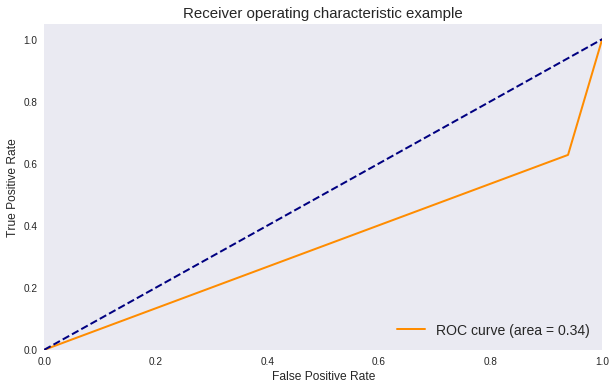

In [0]:
plot_roc(y_true_2, y_score_2)

In [0]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [0]:
TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE = positive_negative_measurement(y_true_2, y_score_2)
postives_negatives = [[TRUE_POSITIVE, FALSE_POSITIVE], 
                      [FALSE_NEGATIVE, TRUE_NEGATIVE]]

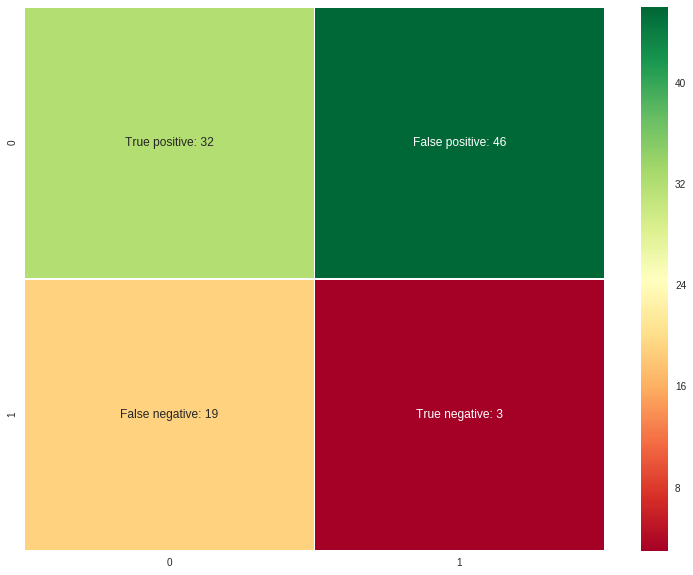

In [0]:
import seaborn as sns
sns.set()
labels =  np.array([['True positive: ' + str(TRUE_POSITIVE),
                     'False positive: ' + str(FALSE_POSITIVE)],
                    ['False negative: ' + str(FALSE_NEGATIVE),
                     'True negative: ' + str(TRUE_NEGATIVE)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives, annot = labels, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

In [0]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_NEGATIVE)
print("Sensitivity: ", sensitivity)

# Specificity | selectivity | true negative rate (TNR)
specifity = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Specifity: ", specifity)

# Precision | positive predictive value (PPV)
predcision = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_POSITIVE)
print("Precision: ", predcision)

# Negative predictive value (NPV)
npv = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Negative predictive value: ", npv)

# Accuracy 
accuracy = (TRUE_POSITIVE + TRUE_NEGATIVE) / (TRUE_POSITIVE + FALSE_POSITIVE + TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Accuracy: ", accuracy)

Sensitivity:  0.6274509803921569
Specifity:  0.13636363636363635
Precision:  0.41025641025641024
Negative predictive value:  0.13636363636363635
Accuracy:  0.35


## 5. Ensembling the models

In [0]:
from keras.layers import Input

In [0]:
# Single input for multiple models
model_input = Input(shape=(512, 512, 3))

In [0]:
def mobilenet_architecture():
    """
    Pre-build architecture of mobilenet for our dataset.
    """
    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    mobilenet_model = Model(base_model.input, output)
    
    # Getting the summary of architecture
    #mobilenet_model.summary()
    
    # Compiling the model
    mobilenet_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])

    return mobilenet_model

In [0]:
# Model 1
mobilenet_model = mobilenet_architecture()
#mobilenet_model.load_weights("./Saved models/weights.best.mobilenet_epoch_2.hdf5")
mobilenet_model.load_weights("./Saved models/weights.best.mobilenet.hdf5")

In [0]:
def inception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model 
    from keras.applications.inception_v3 import InceptionV3

    # Pre-build model
    base_model = InceptionV3(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    inception_model = Model(base_model.input, output)
    
    # Summary of the model
    #inception_model.summary()
    
    # Compiling the model
    inception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                            loss = 'categorical_crossentropy', 
                            metrics = ['accuracy'])
    
    return inception_model

In [0]:
# Model 2
inception_model = inception_architecture()
inception_model.load_weights("./Saved models/weights.best.inception.hdf5")

In [0]:
def xception_architecture():
    """
    Pre-build architecture of inception for our dataset.
    """
    # Imprting the model
    from keras.applications.xception import Xception

    # Pre-build model
    base_model = Xception(include_top = False, weights = None, input_tensor = model_input)

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    xception_model = Model(base_model.input, output)

    # Summary of the model
    #xception_model.summary()
    
    # Compiling the model
    xception_model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                           loss = 'categorical_crossentropy', 
                           metrics = ['accuracy'])

    return xception_model

In [0]:
# Model 3
xception_model = xception_architecture()
xception_model.load_weights("./Saved models/weights.best.xception.hdf5")

In [0]:
# Appending all models
models = [mobilenet_model, inception_model, xception_model]

In [0]:
def ensemble(models, model_input):
    
    outputs = [model.outputs[0] for model in models]
    
    y = keras.layers.Average()(outputs)
    
    model = Model(model_input, y, name='ensemble')
    
    return model

In [0]:
# Getting ensemble model
ensemble_model = ensemble(models, model_input)

In [0]:
#image_to_predict = path_to_tensor("./../Skin cancer/Dataset/melanoma/ISIC_001126890angle-flipped.jpg").astype('float32')/255.
image_to_predict = path_to_tensor("./Mednode dataset/melanoma/189827.jpg").astype('float32')/255.
ensemble_model.predict(image_to_predict)

array([[0.3765254, 0.6234746]], dtype=float32)

## 5. 2. Evaluating ensemble model

In [0]:
# Compute test set predictions
NUMBER_TEST_SAMPLES = 100

y_true = valid_targets[:NUMBER_TEST_SAMPLES]
y_score = []
for index in range(NUMBER_TEST_SAMPLES): #compute one at a time due to memory constraints
    image_to_predict = path_to_tensor(valid_files[index]).astype("float32")/255.
    probs = ensemble_model.predict(image_to_predict)
    if np.argmax(probs) == 0:
        y_score.append([1., 0.])
    elif np.argmax(probs) == 1:
        y_score.append([0., 1.])
    print("Predicted value {}... ".format(index+1) + " Melanoma : ", probs[0][1],  " | Other : ", probs[0][0])
    print("Real values {}...".format(index+1) + "      Melanoma : ", valid_targets[index][1], "      | Other : ", valid_targets[index][0])
    print("---------------------------------------------------------------------------")
    
    
correct = np.array(y_true) == np.array(y_score)

Predicted value 1...  Melanoma :  0.6096075  | Other :  0.39039248
Real values 1...      Melanoma :  0.0       | Other :  1.0
---------------------------------------------------------------------------
Predicted value 2...  Melanoma :  0.65012866  | Other :  0.34987137
Real values 2...      Melanoma :  0.0       | Other :  1.0
---------------------------------------------------------------------------
Predicted value 3...  Melanoma :  0.64401424  | Other :  0.35598582
Real values 3...      Melanoma :  1.0       | Other :  0.0
---------------------------------------------------------------------------
Predicted value 4...  Melanoma :  0.3680851  | Other :  0.631915
Real values 4...      Melanoma :  0.0       | Other :  1.0
---------------------------------------------------------------------------
Predicted value 5...  Melanoma :  0.6270434  | Other :  0.3729566
Real values 5...      Melanoma :  1.0       | Other :  0.0
-------------------------------------------------------------------

IndexError: ignored

In [0]:
print("Accuracy = %2.2f%%" % (np.mean(correct)*100))

Accuracy = 35.00%


In [0]:
# Re-ordering the actual y (for ROC)
y_true_2 = []
for i in range(len(y_true)):
    y_true_2.append(y_true[i][0])
    
# Re-ordering the predicte y (for ROC)
y_score_2 = []
for i in range(len(y_score)):
    y_score_2.append(y_score[i][0])

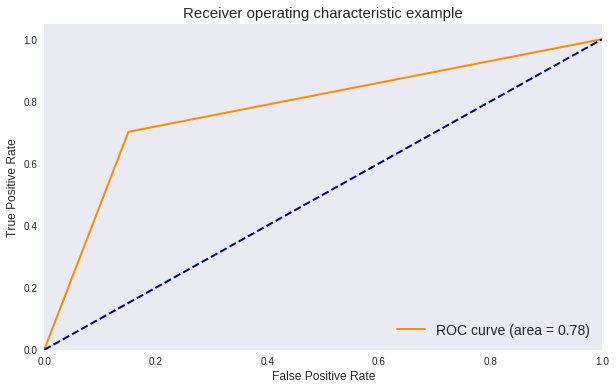

In [0]:
plot_roc(y_true_2, y_score_2)

In [0]:
def positive_negative_measurement(y_true, y_score):
    # Initialization
    TRUE_POSITIVE = 0
    FALSE_POSITIVE = 0
    TRUE_NEGATIVE = 0
    FALSE_NEGATIVE = 0
    
    # Calculating the model
    for i in range(len(y_score)):
        if y_true[i] == y_score[i] == 1:
            TRUE_POSITIVE += 1
        if (y_score[i] == 1) and (y_true[i] != y_score[i]):
            FALSE_POSITIVE += 1
        if y_true[i] == y_score[i] == 0:
            TRUE_NEGATIVE += 1
        if (y_score[i] == 0) and (y_true[i] != y_score[i]):
            FALSE_NEGATIVE += 1

    return(TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE)

In [0]:
TRUE_POSITIVE, FALSE_POSITIVE, TRUE_NEGATIVE, FALSE_NEGATIVE = positive_negative_measurement(y_true_2, y_score_2)
postives_negatives = [[TRUE_POSITIVE, FALSE_POSITIVE], 
                      [FALSE_NEGATIVE, TRUE_NEGATIVE]]

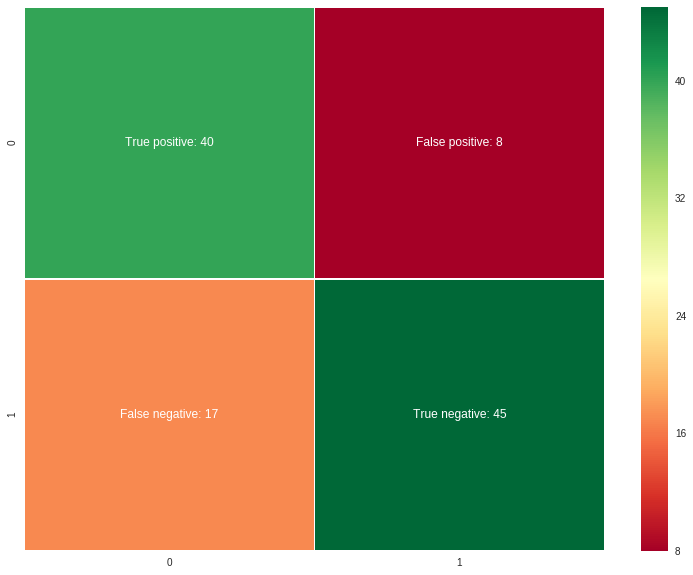

In [0]:
import seaborn as sns
sns.set()
labels =  np.array([['True positive: ' + str(TRUE_POSITIVE),
                     'False positive: ' + str(FALSE_POSITIVE)],
                    ['False negative: ' + str(FALSE_NEGATIVE),
                     'True negative: ' + str(TRUE_NEGATIVE)]])
plt.figure(figsize = (13, 10))
sns.heatmap(postives_negatives, annot = labels, linewidths = 0.1, fmt="", cmap = 'RdYlGn')

In [0]:
# Sensitivity | Recall | hit rate | true positive rate (TPR)
sensitivity = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_NEGATIVE)
print("Sensitivity: ", sensitivity)

# Specificity | selectivity | true negative rate (TNR)
specifity = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Specifity: ", specifity)

# Precision | positive predictive value (PPV)
predcision = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_POSITIVE)
print("Precision: ", predcision)

# Negative predictive value (NPV)
npv = TRUE_NEGATIVE / (TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Negative predictive value: ", npv)

# Accuracy 
accuracy = (TRUE_POSITIVE + TRUE_NEGATIVE) / (TRUE_POSITIVE + FALSE_POSITIVE + TRUE_NEGATIVE + FALSE_NEGATIVE)
print("Accuracy: ", accuracy)

Sensitivity:  0.7017543859649122
Specifity:  0.7258064516129032
Precision:  0.8333333333333334
Negative predictive value:  0.7258064516129032
Accuracy:  0.7727272727272727


## 6. Localization

In [0]:
# Importing the libraries
from keras.applications.mobilenet import preprocess_input
import scipy
import cv2

In [0]:
path_to_model_weight = "./Saved models/weights.best.mobilenet.hdf5"

In [0]:
#img_path = "./Dataset/Image dataset/melanoma/ISIC_0026167_180_angle.jpg"
img_path = "./Mednode dataset/melanoma/189827.jpg"

In [0]:
def getting_two_layer_weights(path_model_weight = path_to_model_weight):
    # The model

    # Imprting the model
    from keras.applications.mobilenet import MobileNet

    # Pre-build model
    base_model = MobileNet(include_top = False, weights = None, input_shape = (512, 512, 3))

    # Adding output layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(units = 2, activation = 'softmax')(x)

    # Creating the whole model
    model = Model(base_model.input, output)
    #model.summary()

    # Compiling the model
    model.compile(optimizer = keras.optimizers.Adam(lr = 0.001), 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    # loading the weights
    model.load_weights(path_model_weight)
    
    # Getting the AMP layer weight
    all_amp_layer_weights = model.layers[-1].get_weights()[0]
    
    # Extracting the wanted output
    mobilenet_model = Model(inputs = model.input, outputs = (model.layers[-3].output, model.layers[-1].output))
    
    return mobilenet_model, all_amp_layer_weights

In [0]:
mobilenet_model, all_amp_layer_weights = getting_two_layer_weights(path_to_model_weight)

In [0]:
def mobilenet_CAM(img_path, model, all_amp_layer_weights):
    # Getting filtered images from last convolutional layer + model prediction output
    last_conv_output, predictions = model.predict(path_to_tensor(img_path)) # last_conv_output.shape = (1, 16, 16, 1024)
    
    # Converting the dimension of last convolutional layer to 16 x 16 x 1024     
    last_conv_output = np.squeeze(last_conv_output)
    
    # Model's prediction
    predicted_class = np.argmax(predictions)
    
    # Bilinear upsampling (resize each image to size of original image)
    mat_for_mult = scipy.ndimage.zoom(last_conv_output, (32, 32, 1), order = 1)  # dim from (16, 16, 1024) to (512, 512, 1024)
    
    # Getting the AMP layer weights
    amp_layer_weights = all_amp_layer_weights[:, predicted_class] # dim: (1024,)    
    
    # CAM for object class that is predicted to be in the image
    final_output = np.dot(mat_for_mult, amp_layer_weights) # dim: 512 x 512

    # Return class activation map (CAM)
    return final_output, predicted_class

In [0]:
final_output, predicted_class = mobilenet_CAM(img_path, mobilenet_model, all_amp_layer_weights)

In [0]:
def plot_CAM(img_path, ax, model, all_amp_layer_weights):
    # Loading the image / resizing to 512x512 / Converting BGR to RGB
    #im = cv2.resize(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB), (512, 512))
    im = path_to_tensor(img_path).astype("float32")/255.
    
    # Plotting the image
    ax.imshow(im.squeeze(), vmin=0, vmax=255)
    
    # Getting the class activation map
    CAM, pred = mobilenet_CAM(img_path, model, all_amp_layer_weights)
    
    CAM = (CAM - CAM.min()) / (CAM.max() - CAM.min())
    
    # Plotting the class activation map
    ax.imshow(CAM, cmap = "jet", alpha = 0.5, interpolation='nearest', vmin=0, vmax=1)

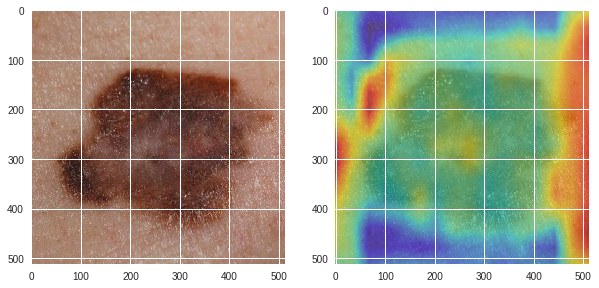

In [0]:
# Visualizing images with and without localization
# Canvas
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 10))
# Image without localization
ax[0].imshow((path_to_tensor(img_path).astype('float32')/255).squeeze())
# Image with localization
CAM = plot_CAM(img_path, ax[1], mobilenet_model, all_amp_layer_weights)
plt.show()

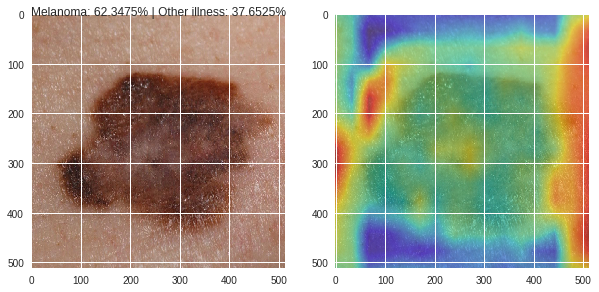

In [0]:
# Getting the iamge tensor
image_to_predict = path_to_tensor(img_path).astype('float32')/255

# Predicting the image
prediction = ensemble_model.predict(image_to_predict)
prediction_final = "Melanoma: " + str(np.round(prediction[0][1]*100, decimals = 4)) + "%" + \
                   " | Other illness: " + str(np.round(prediction[0][0]*100, decimals = 4)) + "%"

# Canvas initialization
fig = plt.figure(figsize = (10, 10))

# First image
ax = fig.add_subplot(121)
ax.imshow(image_to_predict.squeeze())
ax.text(0.3, 1.6, prediction_final)

# Second image
ax = fig.add_subplot(122)
CAM = plot_CAM(img_path, ax, mobilenet_model, all_amp_layer_weights)

plt.show()